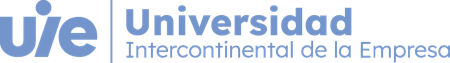

**G25GXX3.10X. Aprendizaje Automático**

**Profesor: Borja González Seoane**

Curso 2025-26

### Importación de librerías

In [69]:
import matplotlib.pyplot as plt  # autoflake: skip
import pandas as pd  # autoflake: skip
import plotly.express as px  # autoflake: skip
import seaborn as sns  # autoflake: skip
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### Descripción general del conjunto de datos y sus variables


In [70]:
# Cargamos datos del dataset elegido
datos = pd.read_csv("bank.csv", sep=";")

# Tipos de datos y resumen de las columnas
print("Información del conjunto de datos:")
datos.info()


Información del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [71]:
# Primera vista de los datos
print("\nPrimeras filas del dataset:\n", datos.head())


Primeras filas del dataset:
    age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


In [72]:
# Identificamos variables numéricas y categóricas
columnas_numericas = datos.select_dtypes(include=["int","float64"]).columns.tolist()
columnas_categoricas = datos.select_dtypes(exclude=["int","float64"]).columns.tolist()
print("\nVariables numéricas:", columnas_numericas)
print("Variables categóricas:", columnas_categoricas)


Variables numéricas: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Variables categóricas: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [73]:
# Resumen estadístico de las variables numéricas
datos.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


### Estructura general del dataset

In [74]:
# Revisamos la estructura general del dataset
print("Dimensiones (filas, columnas):", datos.shape)
print("Columnas:", datos.columns.tolist())
print("\nValores nulos por columna:\n", datos.isna().sum())

Dimensiones (filas, columnas): (4521, 17)
Columnas: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

Valores nulos por columna:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [75]:
# Calculamos estadísticas descriptivas de las variables numéricas
estadisticos_numericas = datos[columnas_numericas].describe().T
print("\nEstadísticos básicos (numéricos):\n", estadisticos_numericas)

# Calculamos rangos y valores atípicos usando el método IQR (
atipicos = {}
for columna in columnas_numericas:
    Q1 = datos[columna].quantile(0.25)
    Q3 = datos[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    atipicos[columna] = datos[(datos[columna] < limite_inferior) | (datos[columna] > limite_superior)]

# Mostramos el número de valores atípicos por variable
for columna, datos_atipicos in atipicos.items():
    print(f"Valores atípicos en {columna}: {len(datos_atipicos)}")

# Indicamos si no se encontraron valores atípicos en ninguna variable
if all(len(df_atipicos) == 0 for df_atipicos in atipicos.values()):
    print("No contamos con valores atípicos en las variables numéricas.")


Estadísticos básicos (numéricos):
            count         mean          std     min    25%    50%     75%  \
age       4521.0    41.170095    10.576211    19.0   33.0   39.0    49.0   
balance   4521.0  1422.657819  3009.638142 -3313.0   69.0  444.0  1480.0   
day       4521.0    15.915284     8.247667     1.0    9.0   16.0    21.0   
duration  4521.0   263.961292   259.856633     4.0  104.0  185.0   329.0   
campaign  4521.0     2.793630     3.109807     1.0    1.0    2.0     3.0   
pdays     4521.0    39.766645   100.121124    -1.0   -1.0   -1.0    -1.0   
previous  4521.0     0.542579     1.693562     0.0    0.0    0.0     0.0   

              max  
age          87.0  
balance   71188.0  
day          31.0  
duration   3025.0  
campaign     50.0  
pdays       871.0  
previous     25.0  
Valores atípicos en age: 38
Valores atípicos en balance: 506
Valores atípicos en day: 0
Valores atípicos en duration: 330
Valores atípicos en campaign: 318
Valores atípicos en pdays: 816
Valores 

En nuestro caso consideramos que lo más adecuado es mantener todos los registros del dataset, incluidos aquellos identificados como atípicos. La razón principal es que estos valores no corresponden a errores de medición ni a inconsistencias, sino que reflejan comportamientos reales de los clientes, como saldos bancarios muy elevados, llamadas de duración prolongada o campañas con múltiples intentos de contacto. Si eliminásemos estos casos estaríamos perdiendo información valiosa que puede ser determinante para el modelo predictivo, además de introducir un sesgo artificial en los datos. Por este motivo, optamos por conservarlos y aplicar técnicas de estandarización que nos permiten reducir su impacto sin descartar su aportación al análisis.

### Histogramas para las variables numéricas

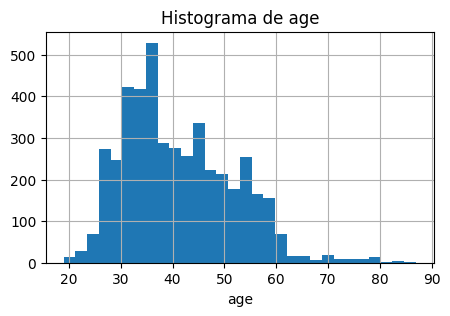

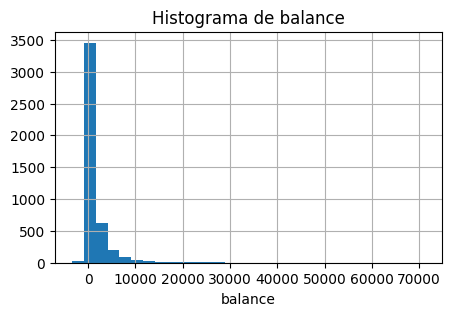

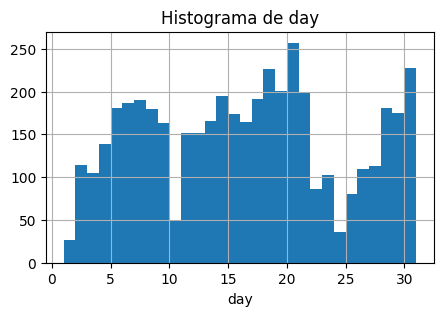

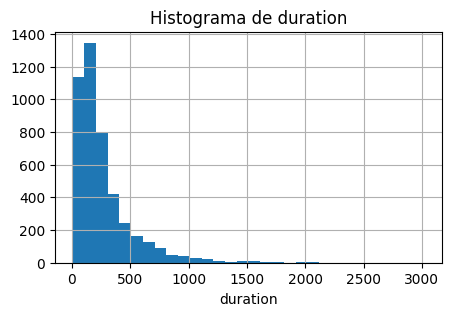

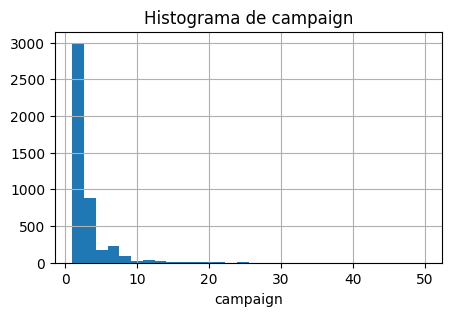

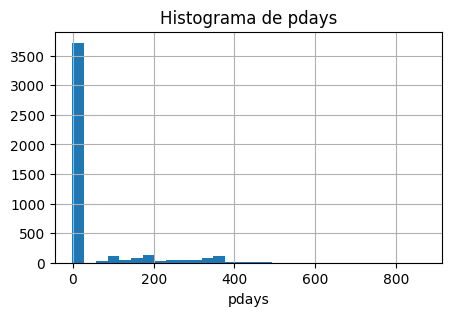

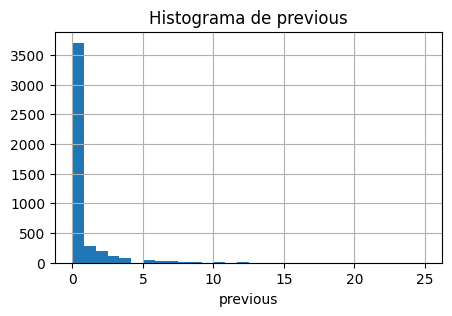

In [76]:
for columna in columnas_numericas:
    plt.figure(figsize=(5, 3))
    datos[columna].dropna().hist(bins=30)
    plt.title(f"Histograma de {columna}")
    plt.xlabel(columna)
    plt.show()

### Diagramas de caja para las variables numéricas

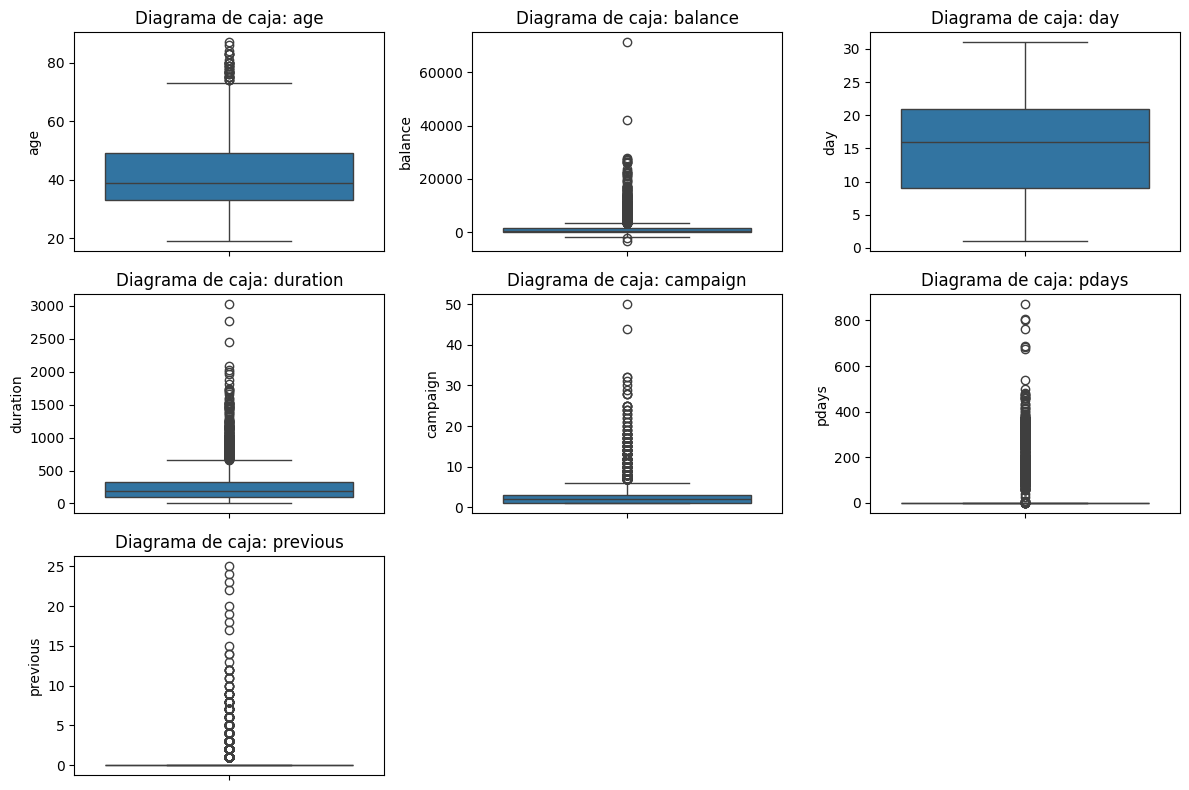

In [77]:
# Diagramas de caja para las variables numéricas
plt.figure(figsize=(12, 8))

for i, columna in enumerate(columnas_numericas, 1):
    plt.subplot(3, 3, i)  # organizamos en 2 filas, 3 columnas (ajustar si hay más variables)
    sns.boxplot(data=datos, y=columna)
    plt.title(f'Diagrama de caja: {columna}')

plt.tight_layout()
plt.show()

### Gráfico de barras para las variables categóricas

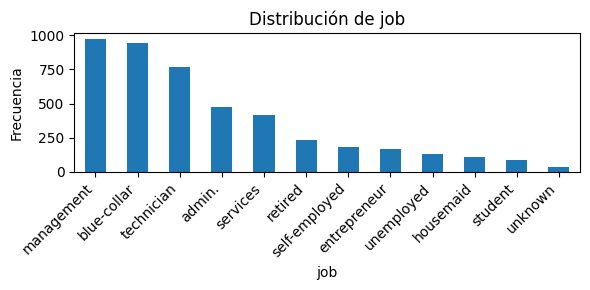

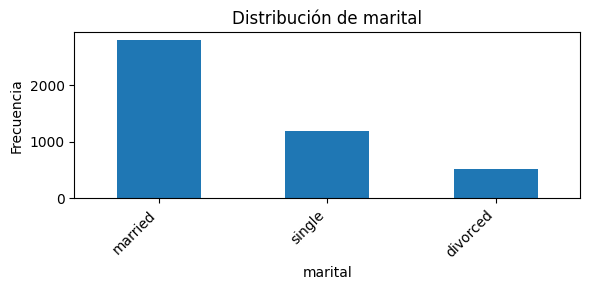

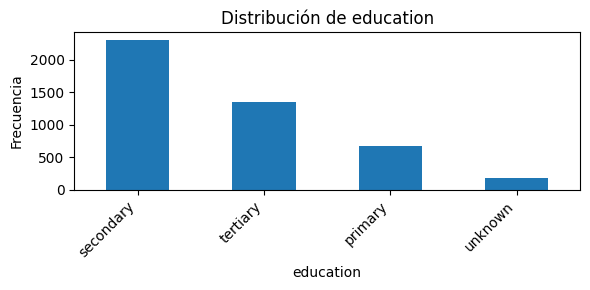

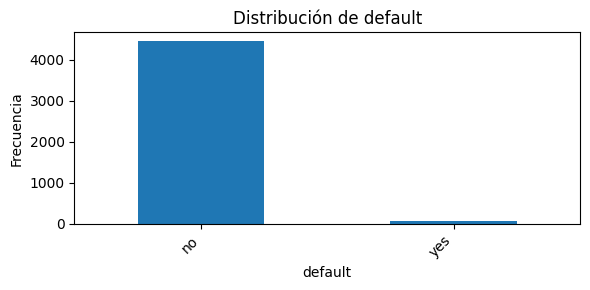

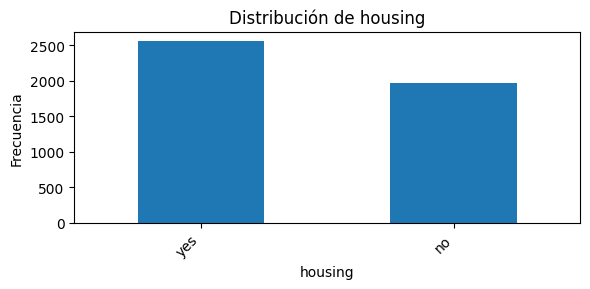

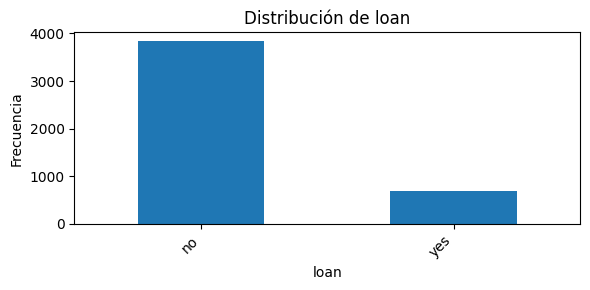

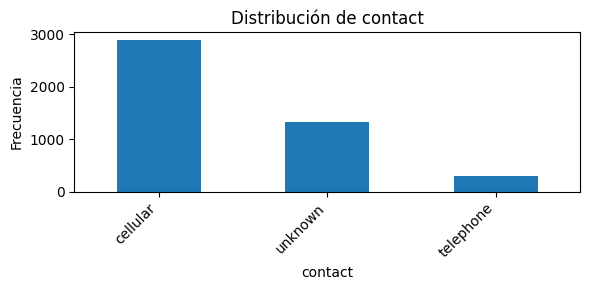

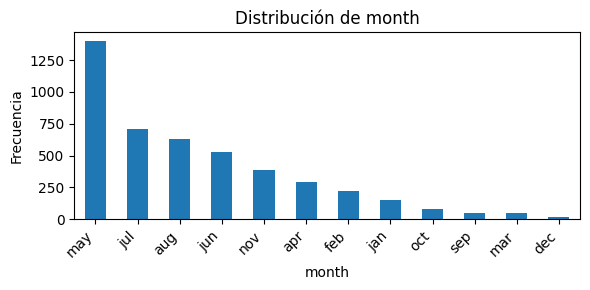

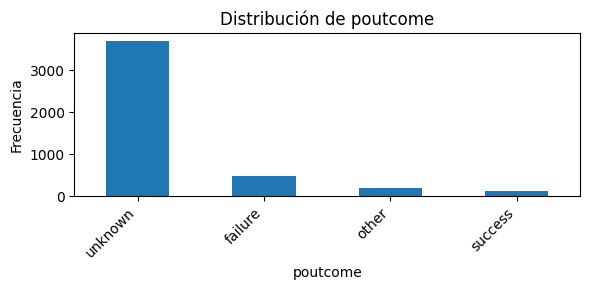

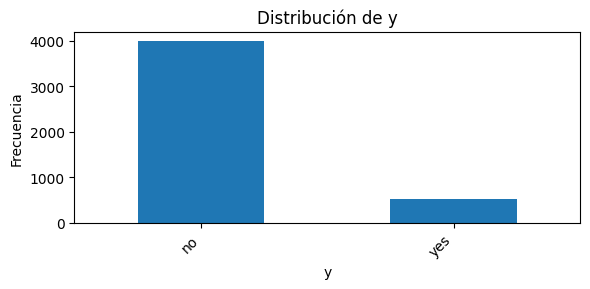

In [78]:
# Representamos gráficos de barras para las variables categóricas
for columna in columnas_categoricas:
    plt.figure(figsize=(6, 3))
    datos[columna].value_counts().plot(kind="bar")
    plt.title(f"Distribución de {columna}")
    plt.xlabel(columna)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

### Relaciones entre variables. Correlaciones, diagramas de dispersión, etc.

y
no     0.88476
yes    0.11524
Name: proportion, dtype: float64


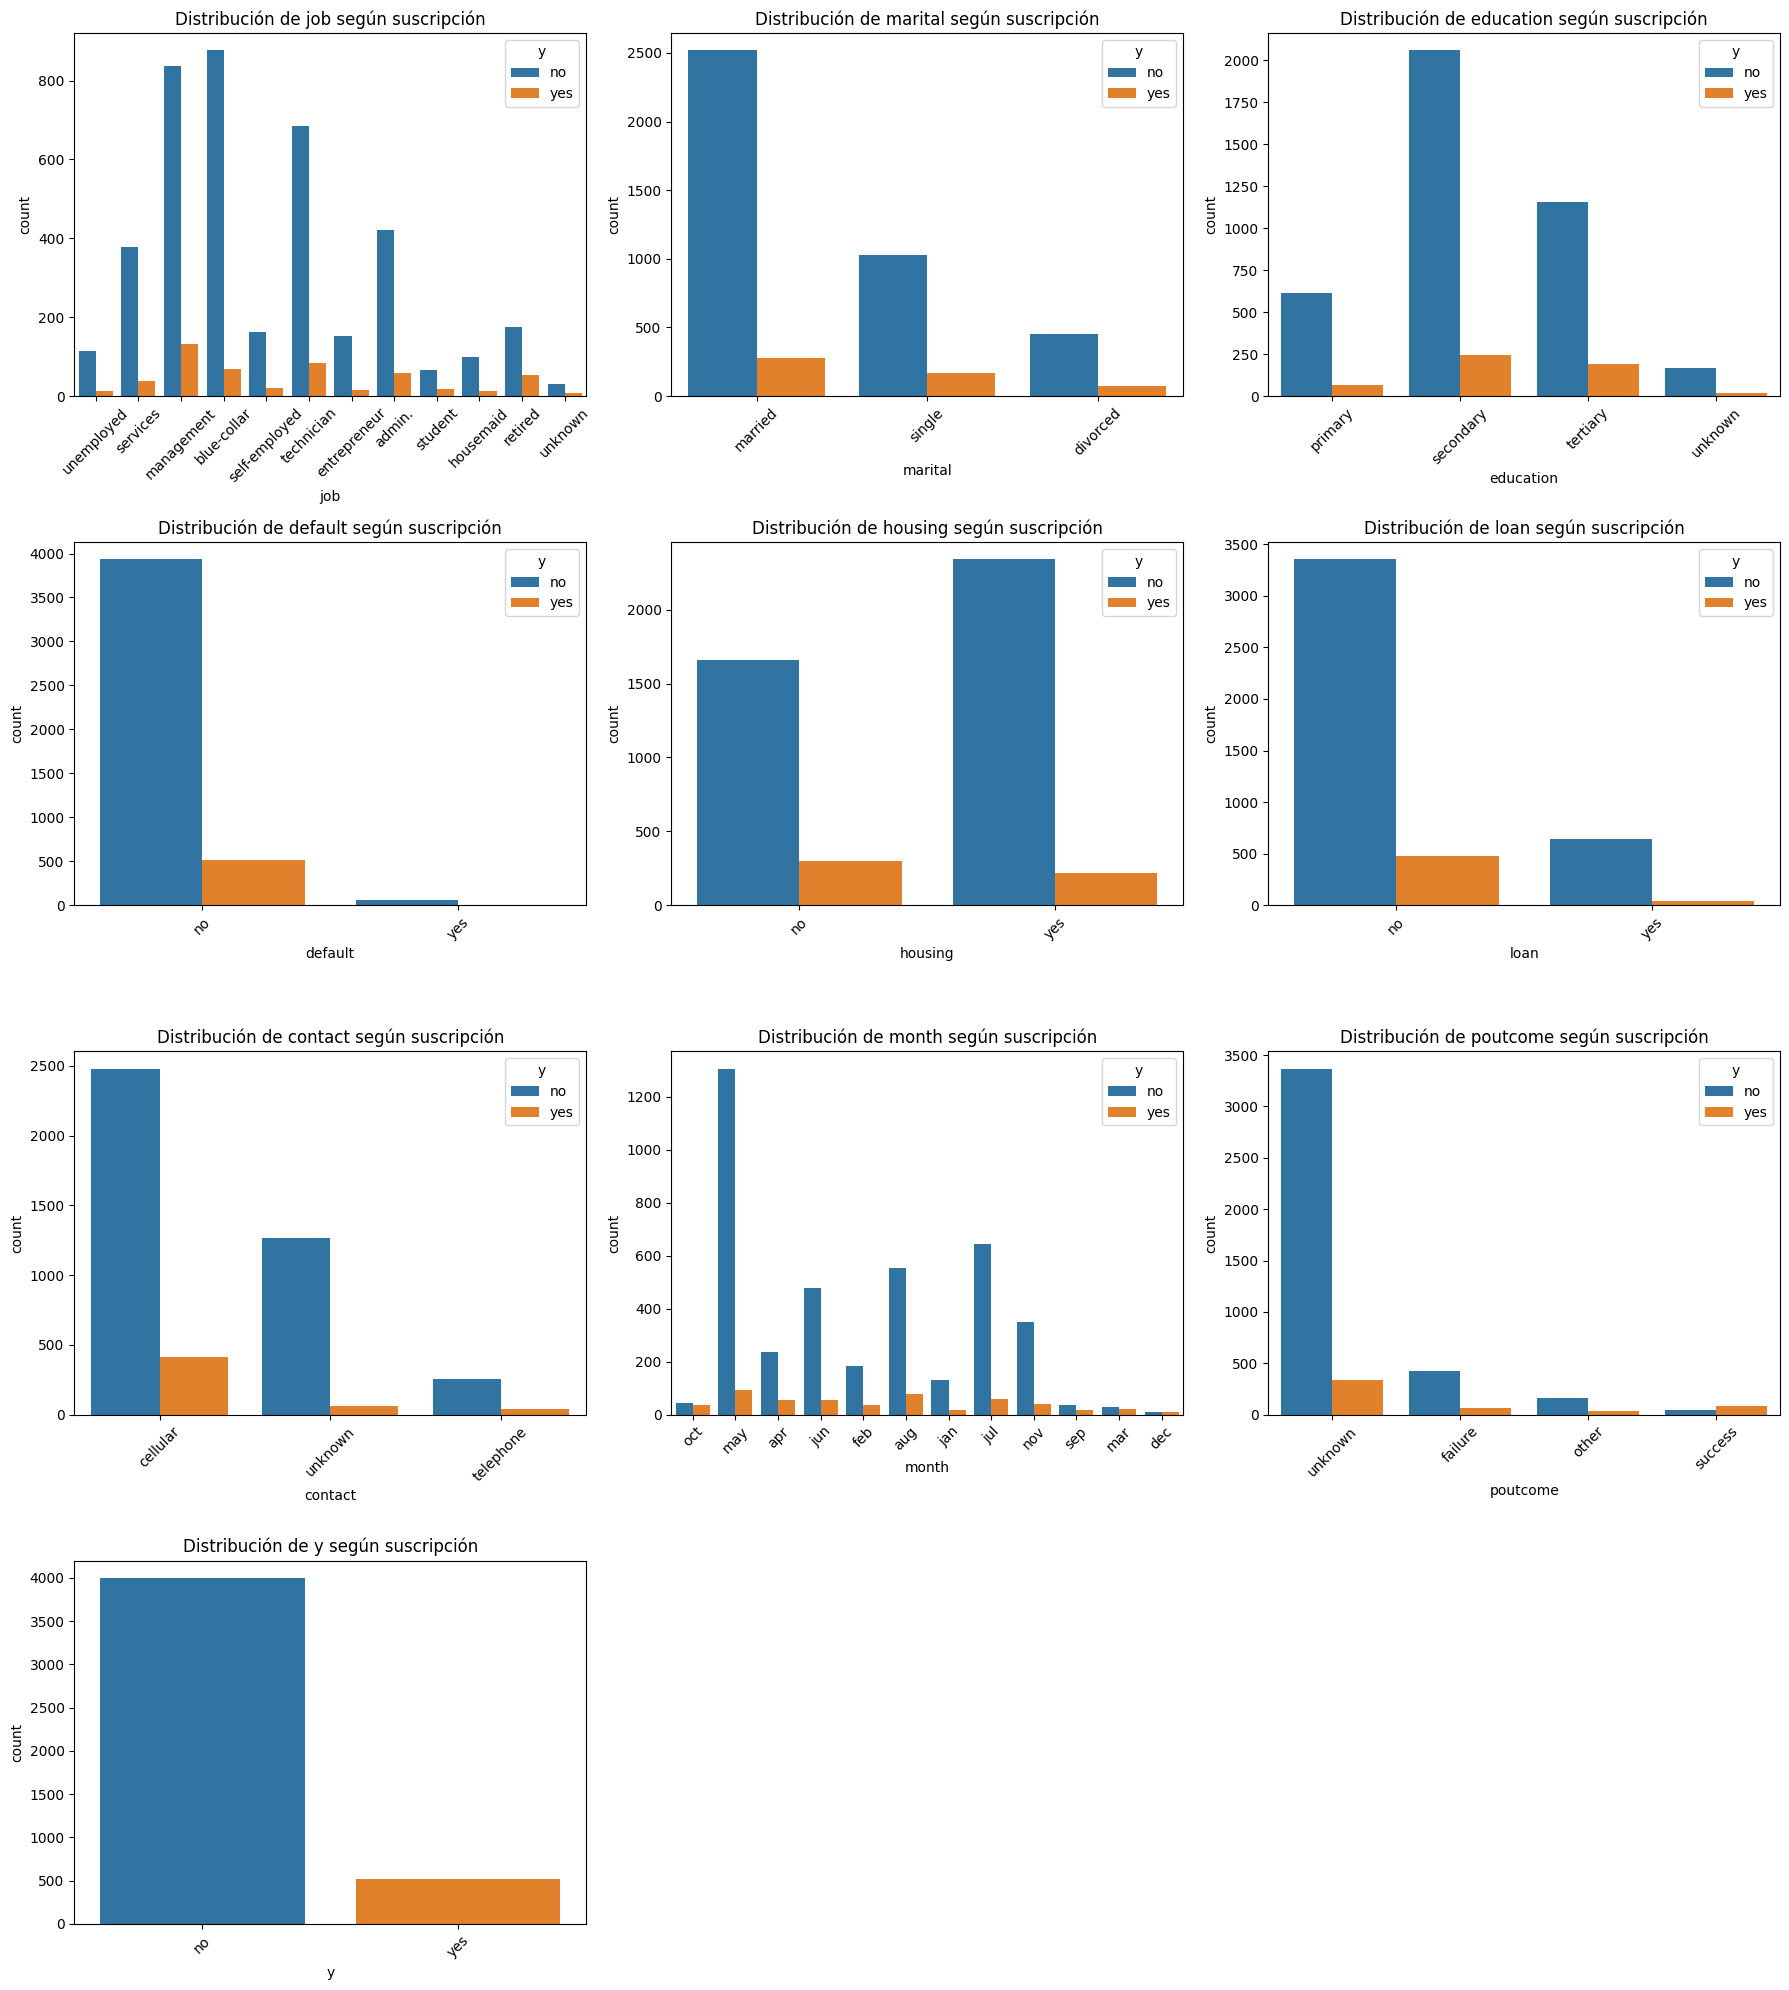

In [79]:
import math

# Analizamos la distribución de la variable objetivo
print(datos["y"].value_counts(normalize=True))

# Diagramas de barras de variables categóricas frente a la variable objetivo
num_cat = len(columnas_categoricas)
filas = math.ceil(num_cat / 3)  # organizamos en 3 columnas
plt.figure(figsize=(18, 5*filas))

for i, columna in enumerate(columnas_categoricas, 1):
    plt.subplot(filas, 3, i)
    sns.countplot(data=datos, x=columna, hue="y")
    plt.title(f"Distribución de {columna} según suscripción")
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

### Diagramas de caja frente a la variable objetivo

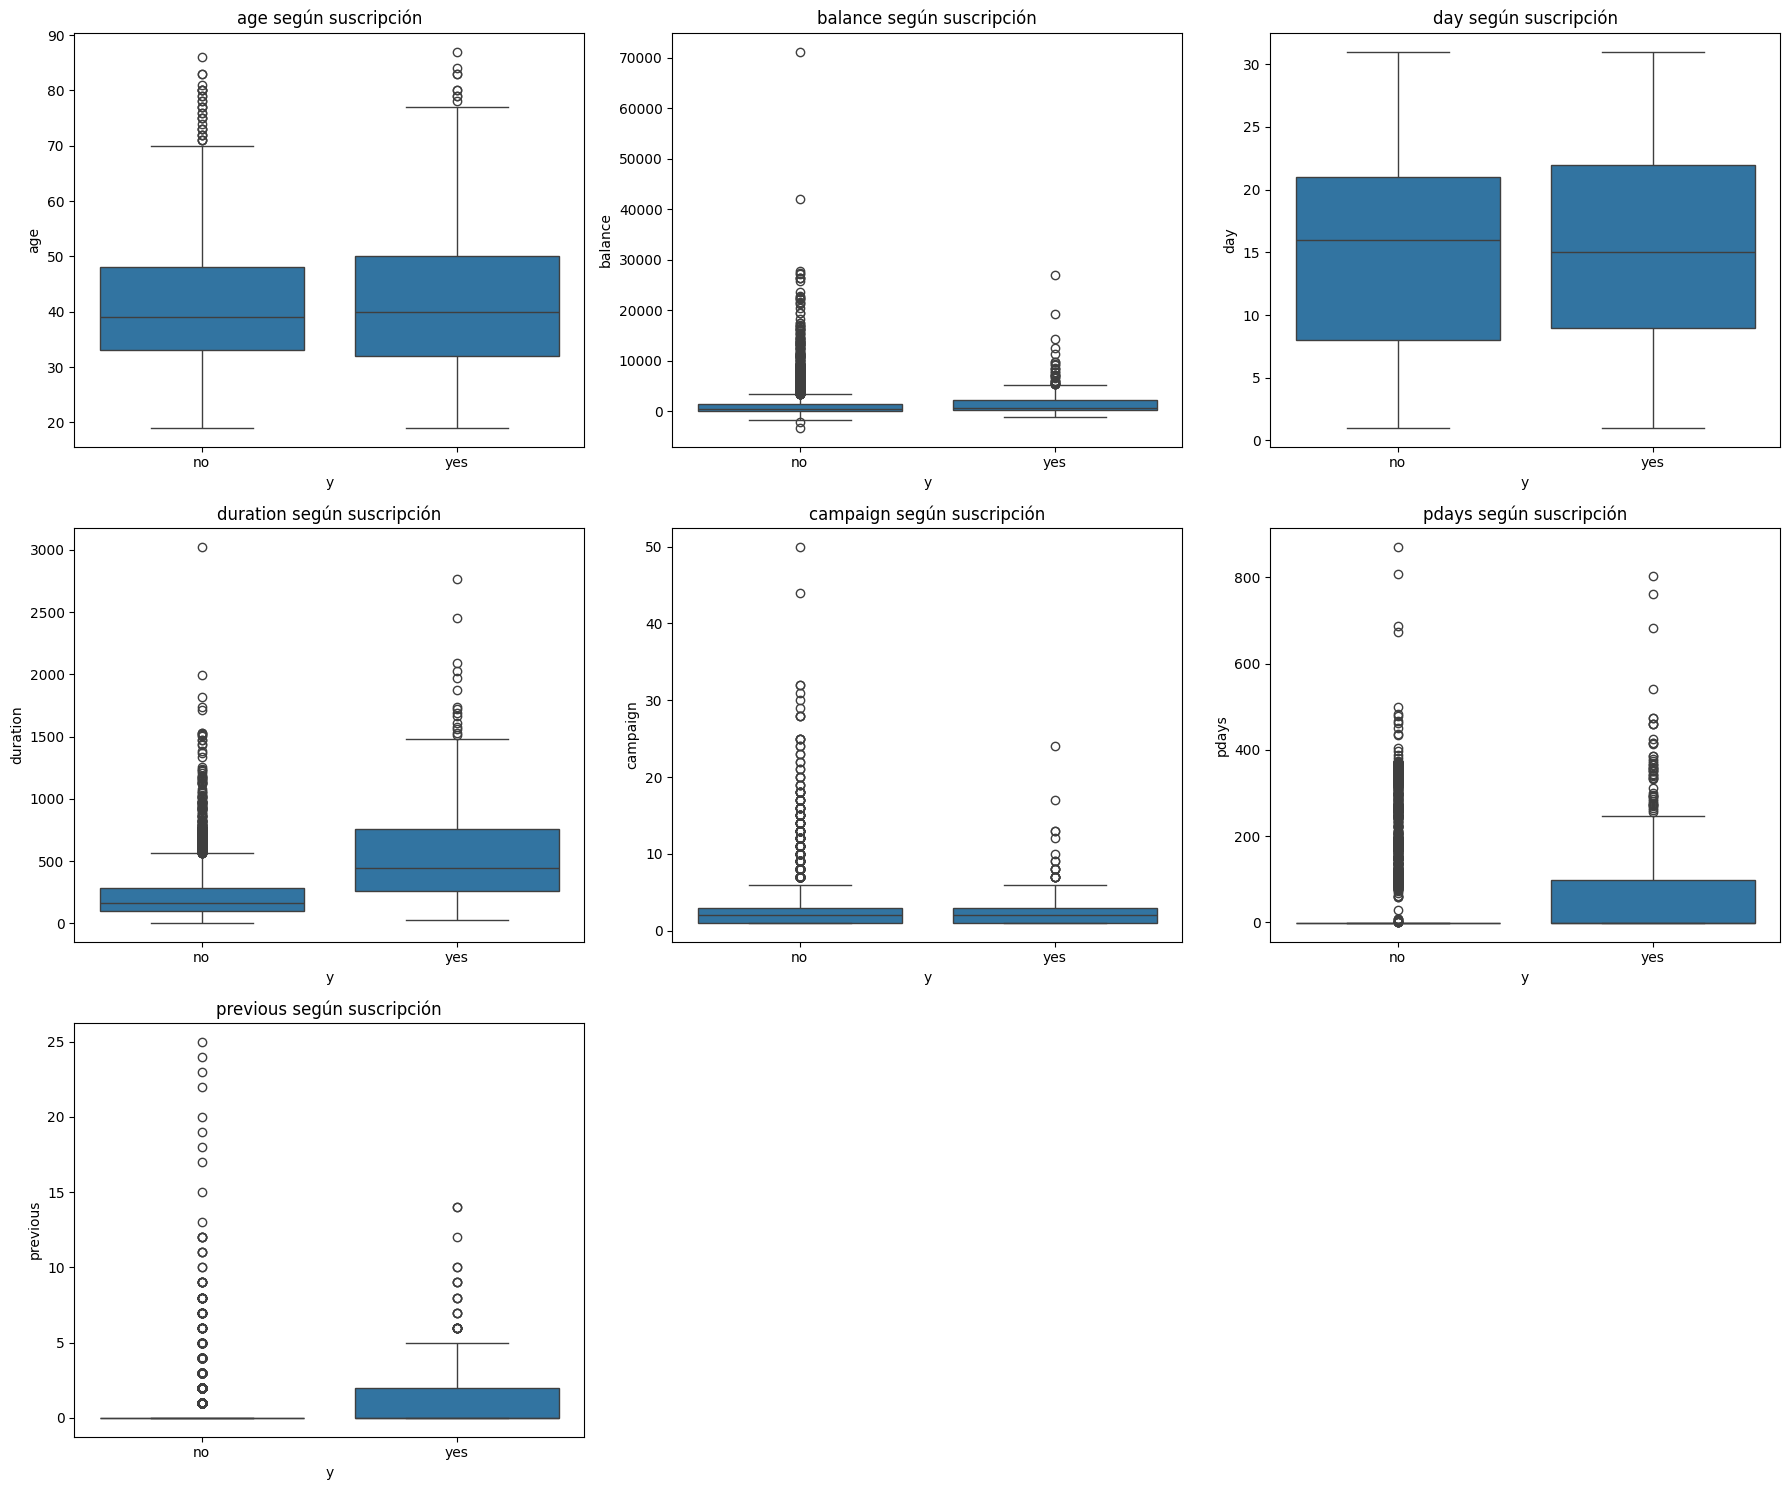

In [80]:
# Diagramas de caja de variables numéricas frente a la variable objetivo
num_num = len(columnas_numericas)
filas = math.ceil(num_num / 3)  # organizamos en 3 columnas
plt.figure(figsize=(18, 5*filas))

for i, columna in enumerate(columnas_numericas, 1):
    plt.subplot(filas, 3, i)
    sns.boxplot(data=datos, x="y", y=columna)
    plt.title(f"{columna} según suscripción")
    plt.tight_layout()

plt.show()

### Mapas de dispersión de algunas variables numéricas

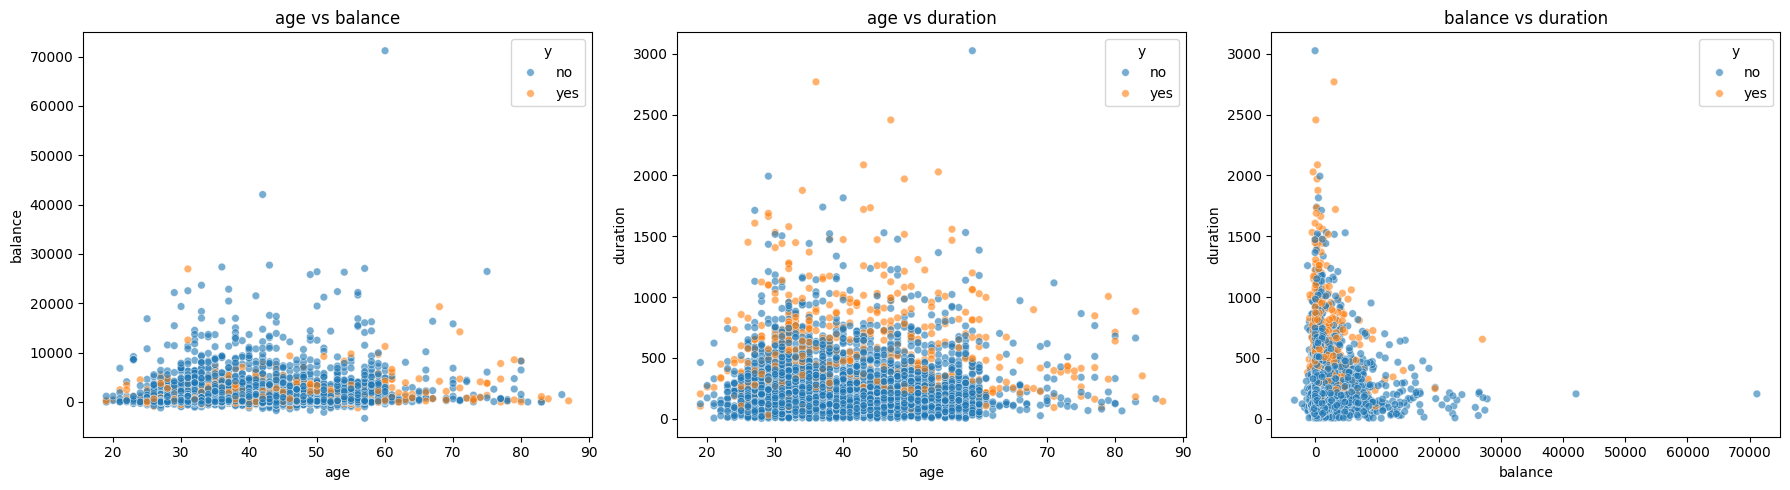

In [81]:
# Seleccionamos solo algunas variables numéricas relevantes
vars_relevantes = ["age", "balance", "duration"]

# Creamos los pares posibles con esas variables
pares_relevantes = []
for i in range(len(vars_relevantes)):
    for j in range(i+1, len(vars_relevantes)):
        pares_relevantes.append((vars_relevantes[i], vars_relevantes[j]))

# Calculamos el número de filas necesarias (3 gráficos por fila)
num_pares = len(pares_relevantes)
filas = math.ceil(num_pares / 3)

# Creamos los subplots para los mapas de dispersión
plt.figure(figsize=(18, 5*filas))

for i, (x_var, y_var) in enumerate(pares_relevantes, 1):
    plt.subplot(filas, 3, i)
    sns.scatterplot(
        data=datos,
        x=x_var,
        y=y_var,
        hue="y",
        alpha=0.6,
        s=30
    )
    plt.title(f"{x_var} vs {y_var}")
    plt.tight_layout()

plt.show()

### Matriz de correlación entre las variables numéricas

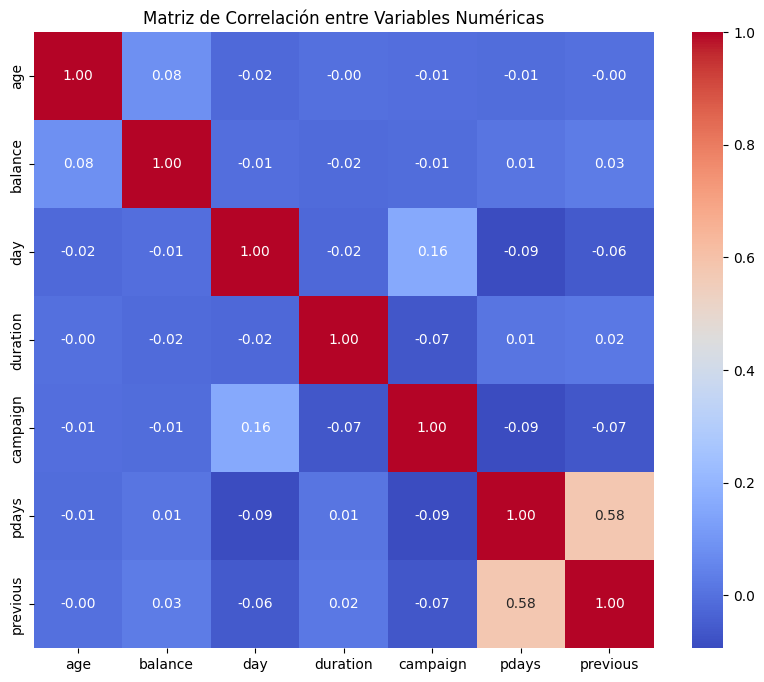

In [82]:
# Calculamos la matriz de correlación
matriz_correlacion = datos[columnas_numericas].corr()

# Mostramos la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

Al analizar la matriz de correlación entre las variables numéricas observamos que la mayoría de las correlaciones son muy bajas, próximas a cero. Esto era esperable, ya que variables como la edad, el saldo en cuenta, la duración de la llamada o el número de contactos no están directamente relacionadas entre sí. La única relación moderada que identificamos es la existente entre pdays y previous, lo cual resulta lógico porque cuantos más días hayan pasado desde la última campaña, mayor suele ser también el número de contactos previos registrados.

### Matriz de correlación de las variables númericas con la variable objetivo

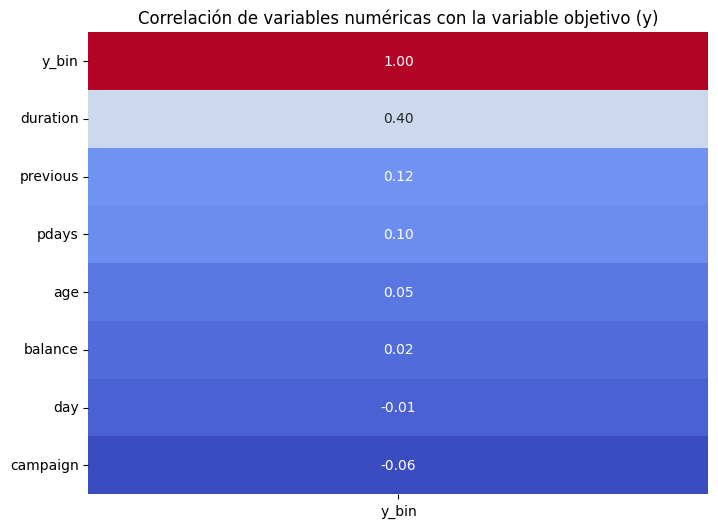

In [83]:
# Creamos una copia con la variable objetivo como binaria
datos_cor = datos.copy()
datos_cor["y_bin"] = datos_cor["y"].map({"yes": 1, "no": 0})

# Calculamos matriz de correlación incluyendo y_bin
matriz_correlacion_y = datos_cor[columnas_numericas + ["y_bin"]].corr()

# Visualizamos en un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    matriz_correlacion_y[["y_bin"]].sort_values(by="y_bin", ascending=False),
    annot=True, cmap="coolwarm", fmt=".2f", cbar=False
)
plt.title("Correlación de variables numéricas con la variable objetivo (y)")
plt.show()

### Estandarización

In [84]:
# Copiamos el dataset original para no modificarlo directamente
datos_estandarizados = datos.copy()

# Estandarización 
escalador_std = StandardScaler()
datos_estandarizados[columnas_numericas] = escalador_std.fit_transform(datos[columnas_numericas])

print("Primeras filas después de la estandarización:")
print(datos_estandarizados[columnas_numericas].head())

Primeras filas después de la estandarización:
        age   balance       day  duration  campaign     pdays  previous
0 -1.056270  0.121072  0.374052 -0.711861 -0.576829 -0.407218 -0.320413
1 -0.772583  1.118644 -0.596026 -0.169194 -0.576829  2.989044  2.041734
2 -0.583458 -0.024144  0.010273 -0.303898 -0.576829  2.899143  0.270124
3 -1.056270  0.017726 -1.566105 -0.250017  0.387967 -0.407218 -0.320413
4  1.686036 -0.472753 -1.323585 -0.146102 -0.576829 -0.407218 -0.320413


### Normalización

In [85]:
# Normalización 
escalador_minmax = MinMaxScaler()
datos_normalizados = datos.copy()
datos_normalizados[columnas_numericas] = escalador_minmax.fit_transform(datos[columnas_numericas])

print("\nPrimeras filas después de la normalización:")
print(datos_normalizados[columnas_numericas].head())


Primeras filas después de la normalización:
        age   balance       day  duration  campaign     pdays  previous
0  0.161765  0.068455  0.600000  0.024826  0.000000  0.000000      0.00
1  0.205882  0.108750  0.333333  0.071500  0.000000  0.389908      0.16
2  0.235294  0.062590  0.500000  0.059914  0.000000  0.379587      0.04
3  0.161765  0.064281  0.066667  0.064548  0.061224  0.000000      0.00
4  0.588235  0.044469  0.133333  0.073486  0.000000  0.000000      0.00


### Comparación entre datos originales vs estandarizados y normalizados

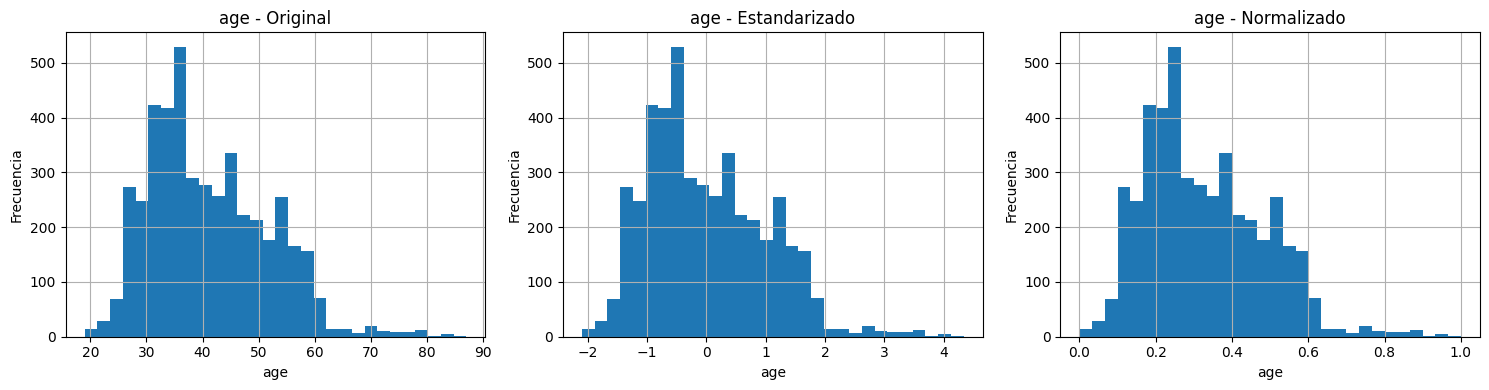

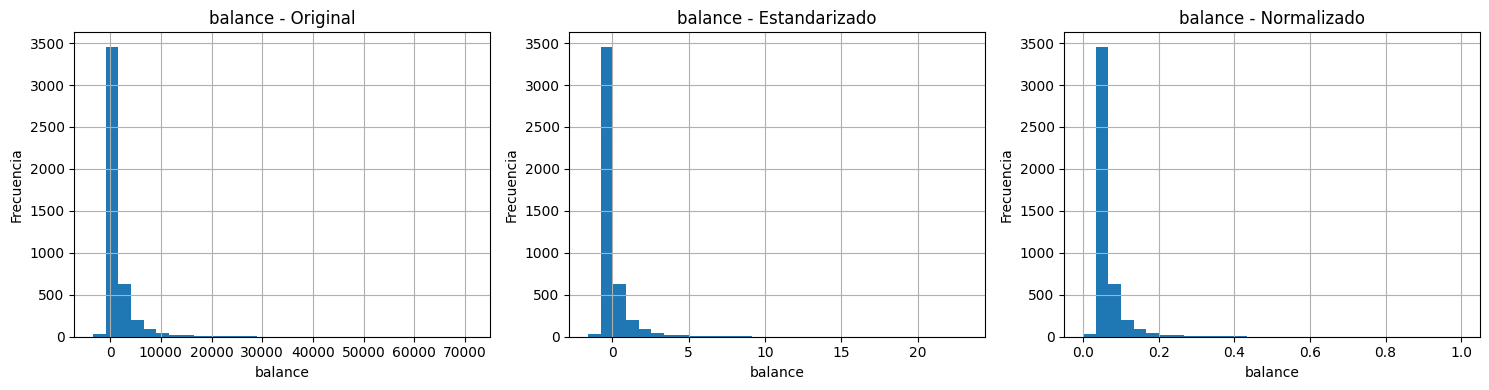

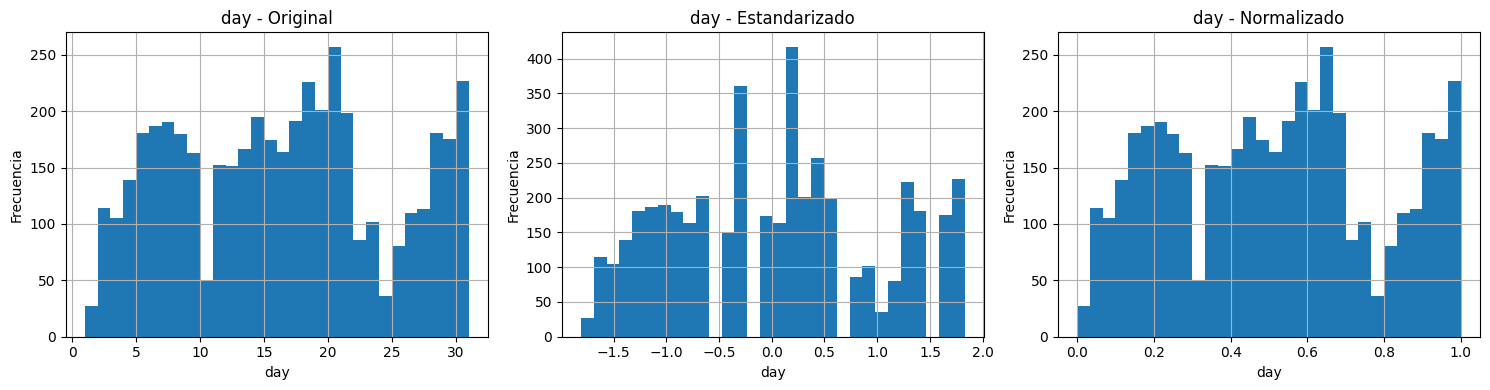

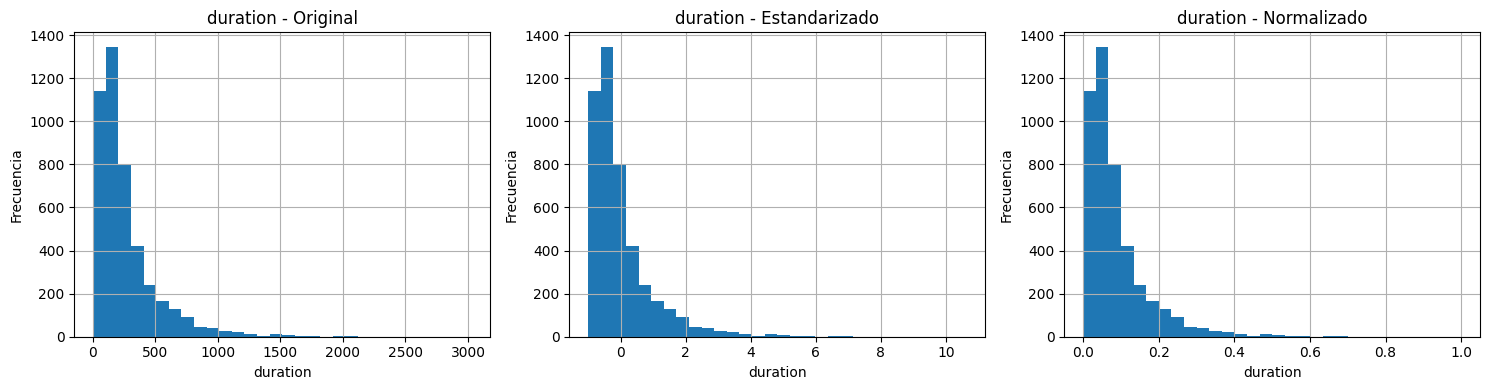

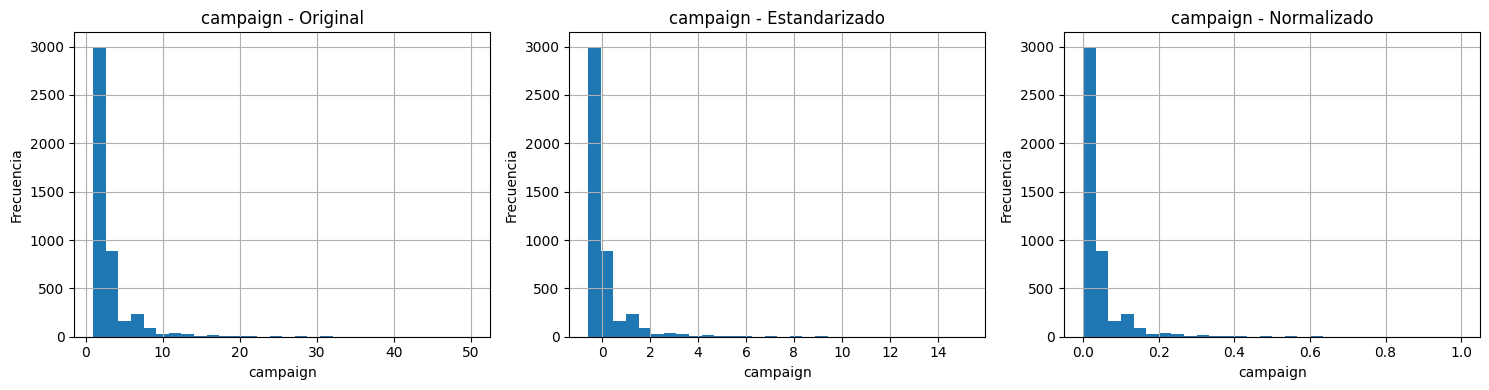

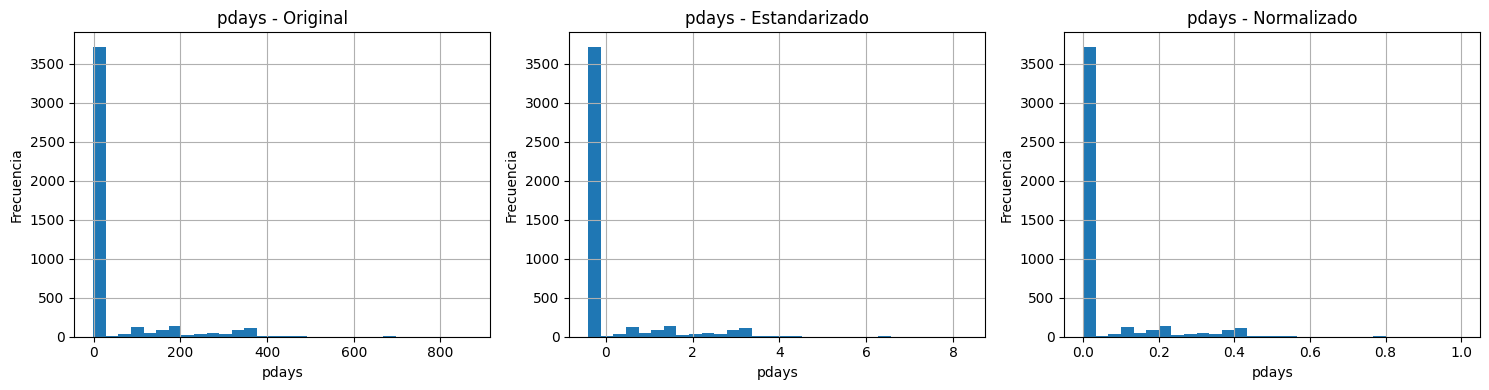

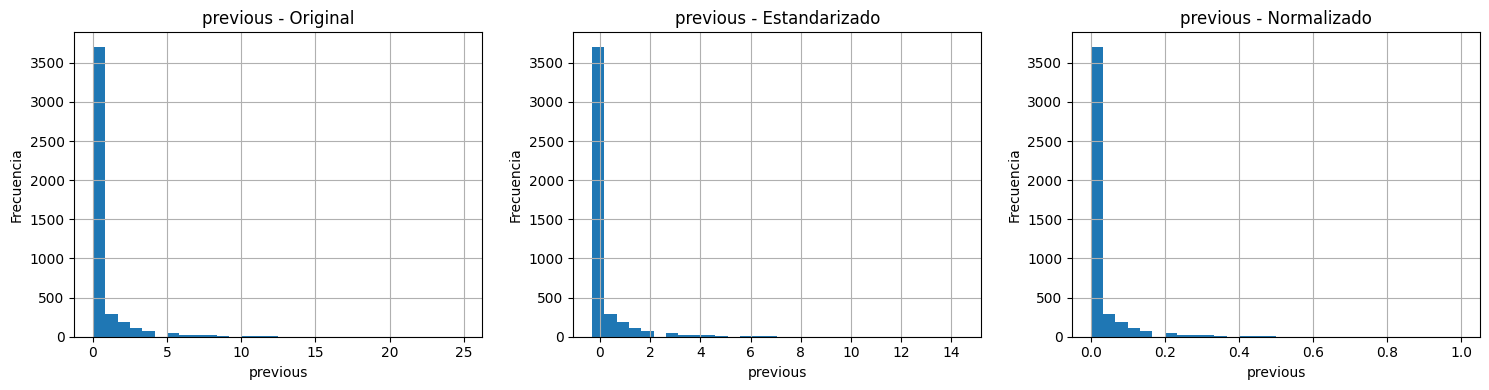

In [86]:
# Dibujamos histogramas comparativos
for columna in columnas_numericas:
    plt.figure(figsize=(15,4))
    
    # Original
    plt.subplot(1, 3, 1)
    datos[columna].hist(bins=30)
    plt.title(f"{columna} - Original")
    plt.xlabel(columna)
    plt.ylabel("Frecuencia")
    
    # Estandarizado
    plt.subplot(1, 3, 2)
    datos_estandarizados[columna].hist(bins=30)
    plt.title(f"{columna} - Estandarizado")
    plt.xlabel(columna)
    plt.ylabel("Frecuencia")
    
    # Normalizado
    plt.subplot(1, 3, 3)
    datos_normalizados[columna].hist(bins=30)
    plt.title(f"{columna} - Normalizado")
    plt.xlabel(columna)
    plt.ylabel("Frecuencia")
    
    plt.tight_layout()
    plt.show()

### Comparación final entre datos originales y datos sin valores atípicos

In [87]:
# Creamos una copia del dataset original para no modificarlo directamente
datos_limpios = datos.copy()

for columna in columnas_numericas:
    Q1 = datos[columna].quantile(0.25)
    Q3 = datos[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    # Filtramos registros que estén dentro de los límites
    datos_limpios = datos_limpios[
        (datos_limpios[columna] >= limite_inferior) & 
        (datos_limpios[columna] <= limite_superior)
    ]

print("Dimensiones originales:", datos.shape)
print("Dimensiones después de eliminar atípicos:", datos_limpios.shape)


Dimensiones originales: (4521, 17)
Dimensiones después de eliminar atípicos: (2803, 17)


### Comparación de histogramas

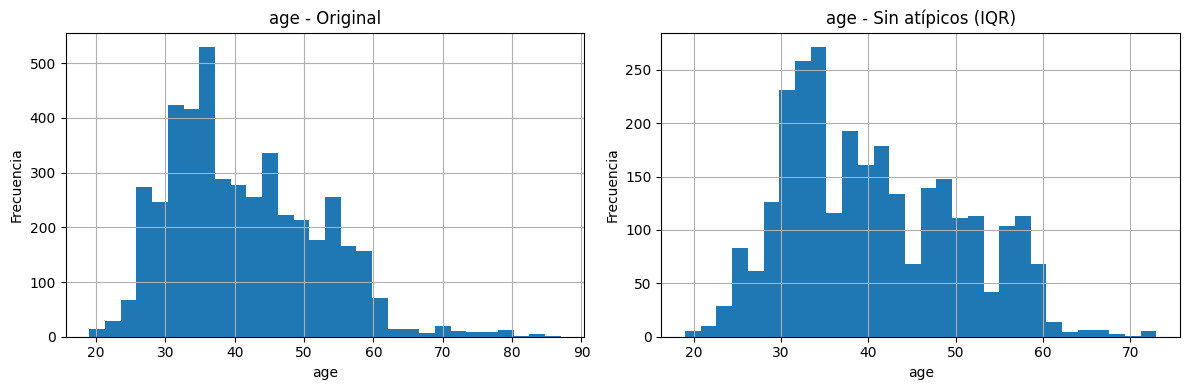

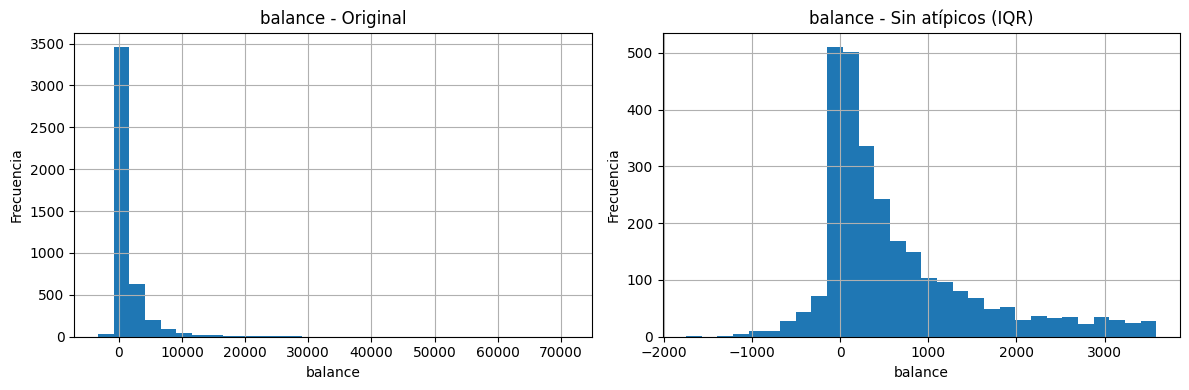

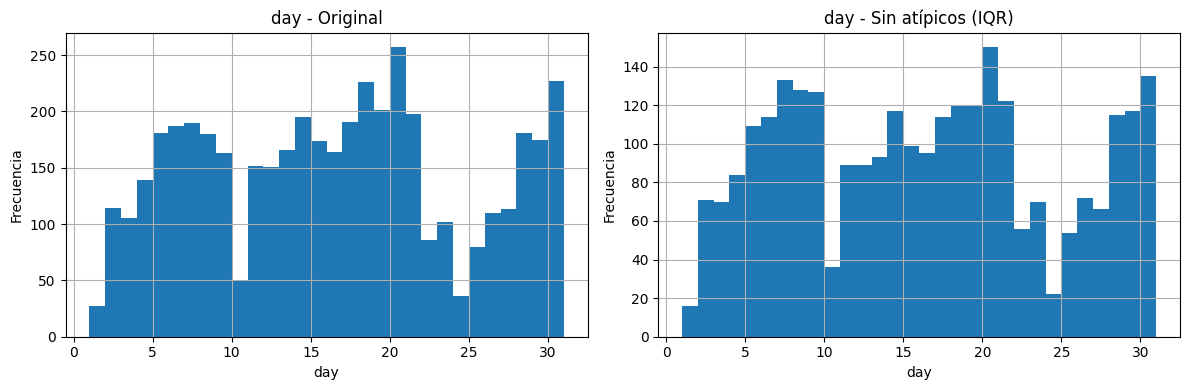

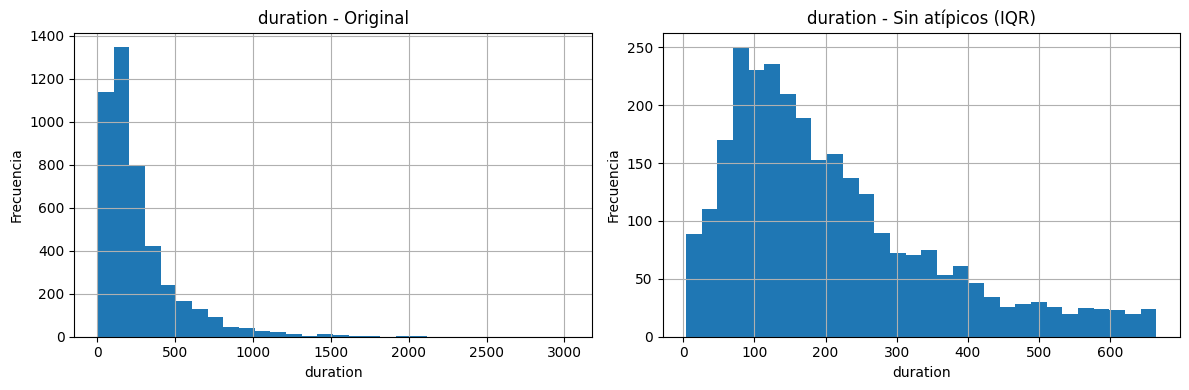

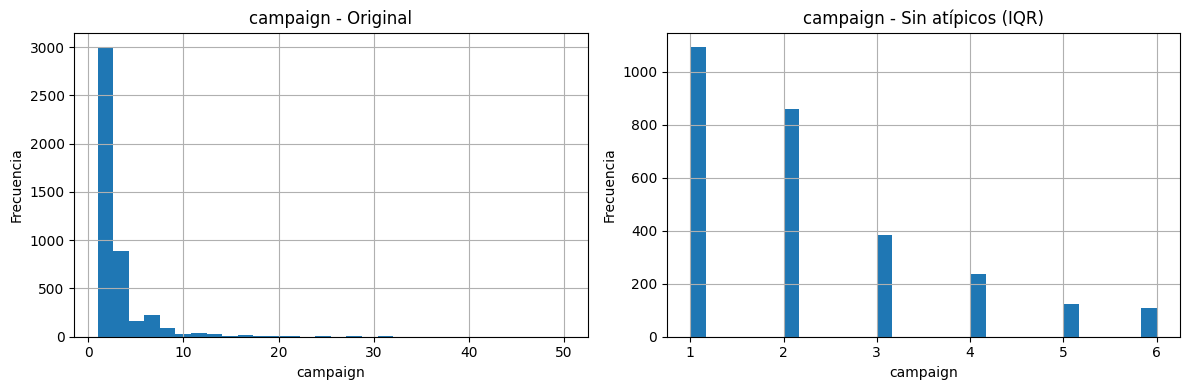

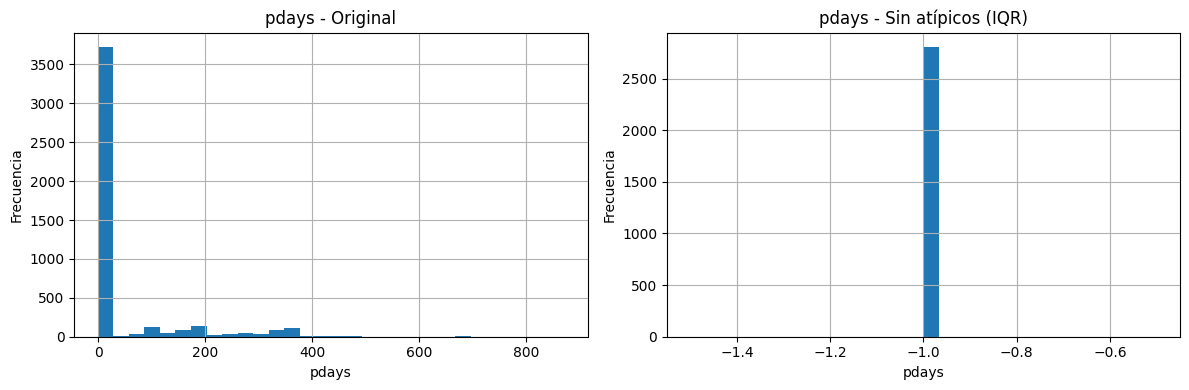

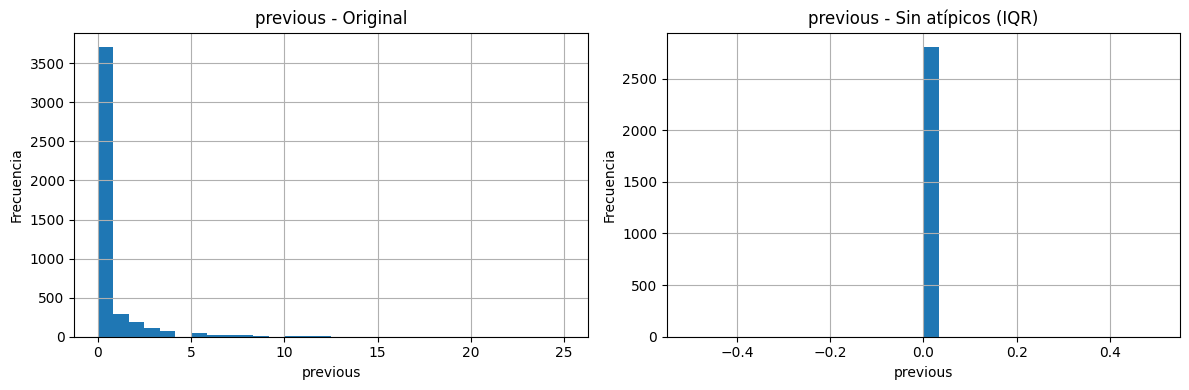

In [88]:
# Histogramas comparativos: dataset original vs limpio
for columna in columnas_numericas:
    plt.figure(figsize=(12,4))
    
    # Dataset original
    plt.subplot(1, 2, 1)
    datos[columna].hist(bins=30)
    plt.title(f"{columna} - Original")
    plt.xlabel(columna)
    plt.ylabel("Frecuencia")
    
    # Dataset limpio
    plt.subplot(1, 2, 2)
    datos_limpios[columna].hist(bins=30)
    plt.title(f"{columna} - Sin atípicos (IQR)")
    plt.xlabel(columna)
    plt.ylabel("Frecuencia")
    
    plt.tight_layout()
    plt.show()
